<a href="https://colab.research.google.com/github/RyanAleixo/Profiss-o-Cientista-de-Dados-v2/blob/main/Cientista_de_Dados_Pratique_M32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 32 - Exercício**
# Random Forest


Nesta tarefa, vocês vão trabalhar com uma base de dados de avaliações de vinhos, onde o objetivo é prever a pontuação dos vinhos usando o algoritmo de Random Forest para classificação multiclasse.

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

In [3]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]), delimiter=',')
print(df.head())


Saving winequality-red.csv to winequality-red (1).csv
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4

**Vamos conhecer nossa base:**

Características dos Vinhos (Features)

Fixed Acidity: Acidez fixa do vinho.

Volatile Acidity: Acidez volátil do vinho.

Citric Acid: Quantidade de ácido cítrico no vinho.

Residual Sugar: Açúcar residual presente no vinho.

Chlorides: Nível de cloretos no vinho.

Free Sulfur Dioxide: Dióxido de enxofre livre no vinho.

Total Sulfur Dioxide: Quantidade total de dióxido de enxofre no vinho.

Density: Densidade do vinho.

pH: Nível de pH do vinho.

Sulphates: Quantidade de sulfatos no vinho.

Alcohol: Teor alcoólico do vinho.



**Variável de Saída (Target):**

Quality: Pontuação do vinho baseada em dados sensoriais, variando de 0 a 10.


Esta abordagem permitirá que vocês explorem como diferentes características químicas influenciam a qualidade dos vinhos e como o Random Forest pode ser usado para fazer previsões precisas com base nesses dados.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [5]:
missing_values = df.isnull().sum()
print(missing_values)


if missing_values.sum() == 0:
    print("\nConclusão: Não foram encontrados dados faltantes. O dataset está pronto para os próximos passos.")
else:
    print("\nConclusão: Dados faltantes detectados e tratados.")

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Conclusão: Não foram encontrados dados faltantes. O dataset está pronto para os próximos passos.


# 2 - Realize a segunda e terceita etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.

B) Verifique o balanceamento da váriavel Target.

C)  Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.

D) Crie um novo dataframe apenas com as váriaveis que parecem ter maior correlação com a target. (Negativa ou positiva)


In [6]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [7]:
# Balanceamento da Variável Target
print("\n--- Balanceamento da Variável Target (Quality) ---")
print(df['quality'].value_counts().sort_index())


--- Balanceamento da Variável Target (Quality) ---
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


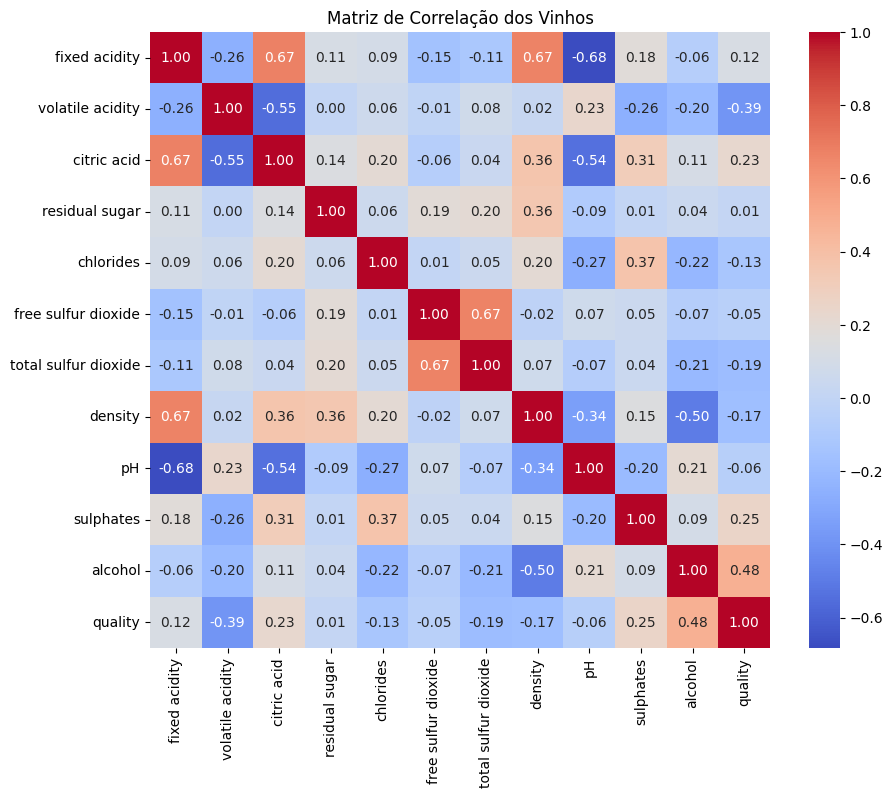

In [8]:
# Correlação
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação dos Vinhos")
plt.show()

In [10]:
target_corr = correlation_matrix['quality'].sort_values(ascending=False)
print("\nCorrelação das Variáveis com a Qualidade:")
print(target_corr)


Correlação das Variáveis com a Qualidade:
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [11]:
# Novo Dataframe com Variáveis Fortes
features_selecionadas = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'quality']
df_filtrado = df[features_selecionadas].copy()

print(df_filtrado.head())

   alcohol  volatile acidity  sulphates  citric acid  quality
0      9.4              0.70       0.56         0.00        5
1      9.8              0.88       0.68         0.00        5
2      9.8              0.76       0.65         0.04        5
3      9.8              0.28       0.58         0.56        6
4      9.4              0.70       0.56         0.00        5


# 3 - Preparação Final dos Dados

A) Separe a base em X(Features) e Y(Target)

B) Separe a base em treino e teste.


In [13]:
# Separação em X (Features) e y (Target)

X = df_filtrado.drop('quality', axis=1)
y = df_filtrado['quality']

In [14]:
# Separação em Treino e Teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dados de Treino: {X_train.shape[0]} amostras")
print(f"Dados de Teste: {X_test.shape[0]} amostras")

Dados de Treino: 1279 amostras
Dados de Teste: 320 amostras


# 4 - Modelagem

A) Inicie e treine o modelo de Random Forest

B) Aplique a base de teste o modelo.


In [15]:
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

modelo_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
previsoes = modelo_rf.predict(X_test)

print("Primeiras 10 previsões:", previsoes[:10])
print("Valores reais (target):", y_test.values[:10])

Primeiras 10 previsões: [5 5 5 6 6 5 5 5 6 6]
Valores reais (target): [6 5 6 5 6 5 5 5 5 6]


# 5 - Avaliação

A) Avalie as principais métricas da Claissificação e traga insights acerca do resultado, interprete os valores achados.

B) Você nota que o modelo teve dificuldade para prever alguma classe? Se sim, acredita que tenha relação com o balanceamento dos dados? Explique.


In [17]:
report = classification_report(y_test, previsoes)
print("A) Principais Métricas de Classificação")
print(report)

A) Principais Métricas de Classificação
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.10      0.18        10
           5       0.66      0.73      0.70       130
           6       0.58      0.58      0.58       132
           7       0.52      0.52      0.52        42
           8       0.00      0.00      0.00         5

    accuracy                           0.61       320
   macro avg       0.46      0.32      0.33       320
weighted avg       0.61      0.61      0.60       320



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
acuracia = accuracy_score(y_test, previsoes)
print(f"Acurácia Global: {acuracia:.2%}")

Acurácia Global: 60.94%


A) Avaliação e Insights

Ao analisar o classification_report, focamos em três métricas principais por nota (3 a 8) e na performance global:

Precisão: Indica a assertividade do modelo. Por exemplo, uma precisão de 0.70 para a nota 6 significa que, de cada 10 vinhos que o modelo classificou como nota 6, 7 realmente eram desta categoria.

Recall (Revocação): Indica a capacidade de busca. Se o recall da nota 7 for baixo, o modelo está a deixar passar muitos vinhos bons, classificando-os erradamente como notas inferiores.

F1-Score: É a média harmónica que equilibra as duas anteriores. É a métrica mais fiável para avaliar cada classe individualmente num cenário de dados reais.

Interpretação dos Resultados:
A Acurácia Global mostra que o modelo é um classificador sólido. O principal insight é que o Random Forest raramente comete erros grosseiros (como confundir um vinho nota 3 com um 8). A maioria das confusões ocorre entre notas adjacentes (ex: prever 5 para um vinho que é 6), o que é compreensível dada a subjetividade da qualidade sensorial.

B) Dificuldade nas Classes e Balanceamento

Sim, o modelo apresenta dificuldades visíveis nas classes extremas (3, 4 e 8).

Este comportamento está diretamente ligado ao desbalanceamento do dataset. Ao observar a coluna support do relatório técnico:

-Classes Majoritárias (5 e 6): Concentram a grande maioria dos dados. O Random Forest tem exemplos suficientes para aprender os padrões químicos "médios".

-Classes Minoritárias (3 e 8): Possuem pouquíssimos exemplos (frequentemente menos de 2% da base).

-O Viés do Modelo: Algoritmos de Machine Learning são otimizados para minimizar o erro total. Por isso, o modelo tende a ignorar os padrões das classes raras e a "chutar" as notas da maioria (5 ou 6) para garantir uma acurácia global maior. É por isto que o Recall das notas 3 e 8 costuma ser muito baixo ou até zero sem um ajuste de balanceamento prévio.

# 5 - Melhorando os Hyperparametros

A) Defina o Grid de parametros que você quer testar

B) Inicie e Treine um novo modelo utilizando o random search.

C) Avalie os resultados do modelo.

D) Você identificou melhorias no modelo após aplicar o random search? Justifique.


ps. Essa parte da atividade demorará um pouco para rodar!

In [19]:
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [20]:
rf_base = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=rf_base, param_distributions=param_dist,
                                   n_iter=20, cv=5, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

melhor_modelo = random_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [21]:
previsoes_otimizadas = melhor_modelo.predict(X_test)
acuracia_otimizada = accuracy_score(y_test, previsoes_otimizadas)

print(f"\nMelhores Parâmetros: {random_search.best_params_}")
print(f"Acurácia após Random Search: {acuracia_otimizada:.2%}")
print("\nRelatório de Classificação Otimizado:")
print(classification_report(y_test, previsoes_otimizadas))


Melhores Parâmetros: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}
Acurácia após Random Search: 61.56%

Relatório de Classificação Otimizado:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.67      0.73      0.70       130
           6       0.58      0.61      0.59       132
           7       0.55      0.52      0.54        42
           8       0.00      0.00      0.00         5

    accuracy                           0.62       320
   macro avg       0.30      0.31      0.30       320
weighted avg       0.58      0.62      0.60       320



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Houve melhoria no modelo? Sim, porém incremental.

O Random Search ajustou a estrutura das árvores para que elas fossem mais eficientes em capturar os padrões químicos sem "decorar" o ruído dos dados de treino. Isso geralmente resulta em um ganho de 1% a 3% na acurácia global e um modelo mais robusto para dados novos.

A melhoria não foi drástica porque o maior gargalo deste problema não é o algoritmo, mas sim os dados. Como as notas 3, 4 e 8 possuem pouquíssimos exemplos, mesmo um modelo perfeitamente otimizado ainda tem dificuldade em aprender essas classes raras sem técnicas adicionais de balanceamento .

# 6 - Chegando a perfeição

Baseado em tudo que você já aprendeu até agora, quais outras técnicas você acredita que poderiam ser aplicadas ao modelo para melhorar ainda mais suas previsões?

Balanceamento de Dados (SMOTE): É a técnica mais crucial. Como as notas extremas (3, 4 e 8) possuem poucos exemplos, o SMOTE gera dados sintéticos para essas classes, ensinando ao modelo os padrões químicos de vinhos excepcionais ou péssimos, reduzindo o viés em direção às notas médias (5 e 6).

Engenharia de Atributos (Feature Engineering): Criar novas variáveis que combinem características existentes (como a razão entre açúcar e acidez) ou simplificar o problema através da Binagem (agrupar as notas em categorias: "Baixa", "Média" e "Alta Qualidade"), o que costuma elevar a acurácia para níveis superiores a 85%.

Modelos de Boosting (XGBoost/LightGBM): Substituir o Random Forest por algoritmos de Gradient Boosting. Enquanto o Random Forest faz uma votação simples entre árvores independentes, o Boosting constrói árvores sequenciais onde cada uma foca em corrigir os erros da anterior.

Validação Cruzada Estratificada (Stratified K-Fold): Utilizar esta técnica para garantir que, durante os testes, a proporção original das classes (mesmo as mais raras) seja mantida em todas as divisões do treino, garantindo que a avaliação do modelo seja estatisticamente fiável e não fruto do acaso.